In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train_v9rqX0R.csv')

In [3]:
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test=pd.read_csv('test_AbJTz2l.csv')

In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_test.shape

(5681, 11)

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
#missing values handling

In [13]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [14]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [15]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [17]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
df_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [21]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Exploratory Data Analysis


In [22]:
#!pip install dtale

In [23]:
#import dtale

In [24]:
#dtale.show(df_train)

In [25]:
#!pip install pandas_profiling

In [26]:
from  pandas_profiling import ProfileReport

In [27]:
profile=ProfileReport(df_train, title= "pandas profile report")

In [98]:
#profile

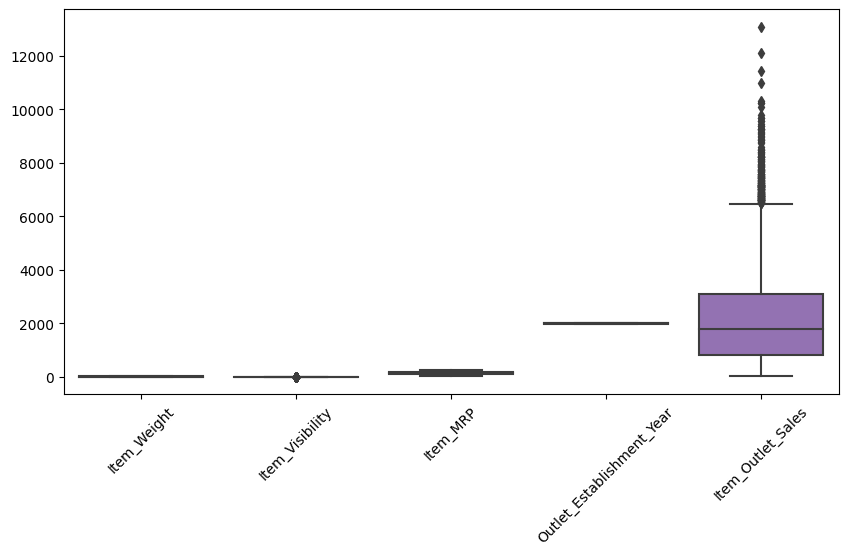

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_train)
plt.xticks(rotation=45)
plt.show()

In [30]:
## Outlier handling

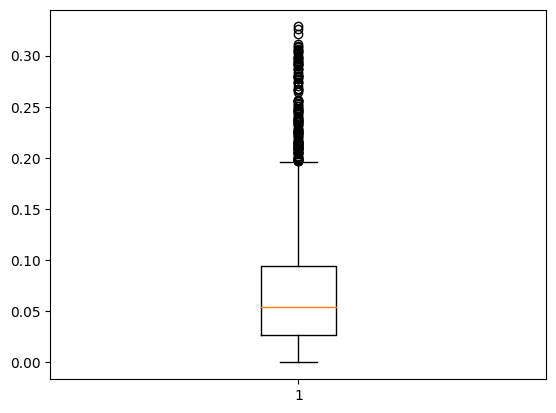

In [31]:
plt.boxplot(df_train['Item_Visibility'])

plt.show()

In [32]:
Q1=np.percentile(df_train['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(df_train['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(df_train['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.0269894775 0.053930934 0.0945852925


In [33]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.07440424500000001 0.195979015


In [34]:
outliers1=[]
for i in df_train['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [35]:
df_train['Item_Visibility']= np.where(df_train['Item_Visibility'] > up_limit, up_limit,
                       np.where(df_train['Item_Visibility'] <low_limit,low_limit, df_train['Item_Visibility']))

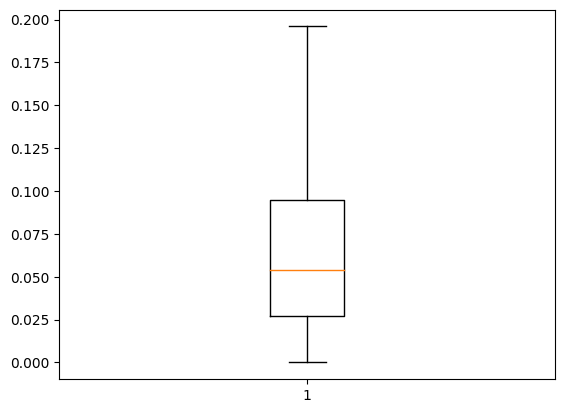

In [36]:
plt.boxplot(df_train['Item_Visibility'])

plt.show()

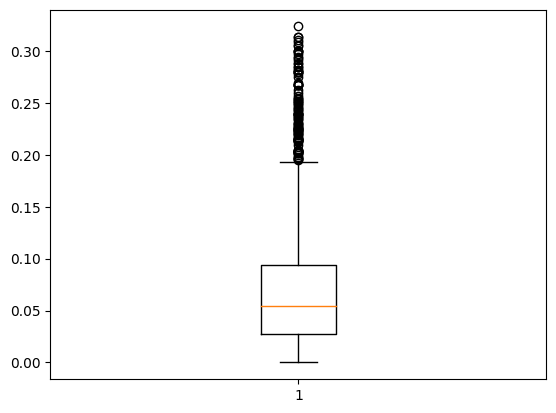

In [37]:
plt.boxplot(df_test['Item_Visibility'])

plt.show()

In [38]:
Q1=np.percentile(df_test['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(df_test['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(df_test['Item_Visibility'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.027046875 0.054154252 0.093462623


In [39]:
iqr=Q3-Q1
iqr
low_limit=Q1-1.5*iqr
up_limit=Q3+1.5*iqr
print(low_limit,up_limit)

-0.072576747 0.193086245


In [40]:
outliers1=[]
for i in df_test['Item_Visibility']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)

In [41]:
df_test['Item_Visibility']= np.where(df_test['Item_Visibility'] > up_limit, up_limit,
                       np.where(df_test['Item_Visibility'] <low_limit,low_limit, df_test['Item_Visibility']))

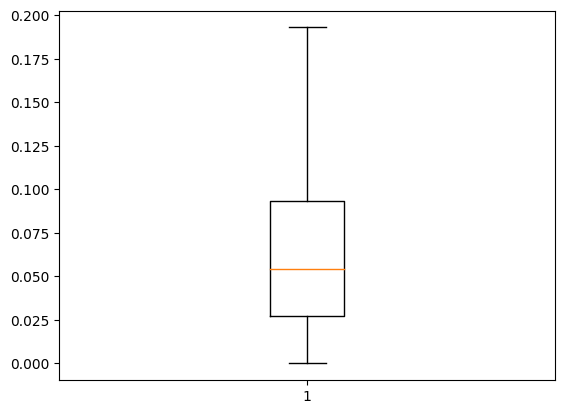

In [42]:
plt.boxplot(df_test['Item_Visibility'])

plt.show()

In [43]:
#Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])

In [46]:
df_test['Item_Fat_Content']=le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']=le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size']=le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']=le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']=le.fit_transform(df_test['Outlet_Type'])

In [47]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [48]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
#splitting data

In [50]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [52]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4532,15.850000,2,0.007145,13,41.0480,2004,2,1,1
186,12.857645,2,0.094154,6,165.7526,1985,2,0,0
7557,17.850000,1,0.037886,14,190.4188,1999,1,0,1
6308,12.857645,2,0.000000,5,230.0668,1985,2,0,0
7297,12.857645,2,0.170001,4,155.9630,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
3045,11.600000,2,0.077321,5,169.3106,2002,1,1,1
629,7.895000,2,0.094549,2,102.6332,2004,2,1,1
746,12.100000,1,0.028165,7,178.1660,1998,1,2,0
2661,15.700000,2,0.030625,13,252.2724,1997,2,0,1


### Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
X_train_std=sc.fit_transform(X_train)

In [55]:
X_test_std=sc.transform(X_test)

In [56]:
X_train_std

array([[-1.92482446e-03,  9.83632279e-01,  2.68679669e+00, ...,
         1.37818311e+00, -1.35762955e+00, -1.52069189e+00],
       [ 1.50322033e-01, -5.70215005e-01, -2.06966369e-01, ...,
        -2.81674238e-01, -1.35762955e+00, -2.53200777e-01],
       [-4.67098517e-01,  9.83632279e-01, -1.14062120e+00, ...,
        -1.94153159e+00,  1.09958262e+00, -2.53200777e-01],
       ...,
       [-1.64624141e+00,  9.83632279e-01, -9.44076696e-01, ...,
        -1.94153159e+00,  1.09958262e+00, -2.53200777e-01],
       [ 6.48050692e-01, -5.70215005e-01, -1.33806280e+00, ...,
        -2.81674238e-01,  1.09958262e+00,  1.01429034e+00],
       [ 1.02919304e-01,  4.09132685e+00,  1.35350185e-01, ...,
        -2.81674238e-01,  1.09958262e+00,  1.01429034e+00]])

## Model building

### Model 1

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [58]:
model_lr=lr.fit(X_train_std,y_train)

In [59]:
y_pred_lr=model_lr.predict(X_test_std)

In [60]:
y_pred_lr

array([ 267.18550999, 1533.50272271, 3291.90946113, ..., 1300.78397171,
       3968.54615888, 2863.73528504])

In [61]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [62]:
r2_score(y_test,y_pred_lr)

0.5193222016772973

In [63]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

RMSE value is: 1173.072451551092


In [64]:
df_train.shape

(8523, 10)

### Model 2

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf=rf.fit(X_train_std,y_train)

In [66]:
y_pred_rf=model_rf.predict(X_test_std)

In [67]:
y_pred_rf

array([ 724.210634,  377.10912 , 2835.116218, ...,  500.288778,
       3717.021582, 2211.82089 ])

In [68]:
r2_score(y_test,y_pred_rf)

0.5407794013698035

In [69]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE value is: 1146.5908837347506


## Model 3

In [70]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model3=lasso.fit(X_train_std,y_train)
y_pred_lasso=model3.predict(X_test_std)

In [71]:
r2_score(y_test,y_pred_lasso)

0.519304326748288

In [72]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

RMSE value is: 1173.0942628266819


## Model  4

In [73]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=5)
model4=rd.fit(X_train_std,y_train)
y_pred_rd=model4.predict(X_test_std)

In [74]:
r2_score(y_test,y_pred_rd)

0.519328432408955

In [75]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

RMSE value is: 1173.0648486168893


In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)



{'alpha': 1}
-1437974.8312055678


## Model 5


In [77]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [78]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1599.7524450294995
RMSE value for k=  2 is: 1438.506282335064
RMSE value for k=  3 is: 1371.1195823366365
RMSE value for k=  4 is: 1336.4045634009376
RMSE value for k=  5 is: 1330.844242022378
RMSE value for k=  6 is: 1317.427306918802
RMSE value for k=  7 is: 1308.2641537130958
RMSE value for k=  8 is: 1304.213050469862
RMSE value for k=  9 is: 1298.9690684227414
RMSE value for k=  10 is: 1309.4531925045753
RMSE value for k=  11 is: 1307.0401718043147
RMSE value for k=  12 is: 1303.724575501417
RMSE value for k=  13 is: 1305.1792282543233
RMSE value for k=  14 is: 1305.2897157352845
RMSE value for k=  15 is: 1303.620348890849
RMSE value for k=  16 is: 1302.9570698810703
RMSE value for k=  17 is: 1307.1555288029292
RMSE value for k=  18 is: 1311.948581456693
RMSE value for k=  19 is: 1315.3870011145245
RMSE value for k=  20 is: 1318.096479308352


In [79]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [80]:
knn = neighbors.KNeighborsRegressor(7)

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
y_pred_knn=model.predict(X_test)

In [81]:
r2_score(y_test,y_pred_knn)

0.4021458127666503

### cross validation

In [82]:
from sklearn.model_selection import cross_validate
cvs_rd=cross_validate(model3,X,y,cv=5)
c1=cvs_rd['test_score'].mean()
c1

0.5054337027116111

In [83]:
from sklearn.model_selection import cross_validate
cvs_rf=cross_validate(model_rf,X,y,cv=5)
c2=cvs_rf['test_score'].mean()
c2

0.5489119584345102

In [84]:
from sklearn.model_selection import cross_validate
cvs_lasso=cross_validate(model3,X,y,cv=5)
c3=cvs_lasso['test_score'].mean()
c3

0.5054337027116111

In [85]:
from sklearn.model_selection import cross_validate
cvs_rd=cross_validate(model4,X,y,cv=5)
c4=cvs_rd['test_score'].mean()
c4

0.5055362934228264

In [86]:
from sklearn.model_selection import cross_validate
cvs_knn=cross_validate(model,X,y,cv=5)
c5=cvs_knn['test_score'].mean()
c5

0.4301938383078099

In [87]:
#predicting y values of best model
y_pred_test=model.predict(df_test)

#y_pred_test=rf.predict(df_test)
y_pred_test

array([1596.01771429, 1527.72565714, 2464.50625714, ..., 1795.28214286,
       3607.01905714, 1241.717     ])

In [88]:
y_pred_test=pd.DataFrame(y_pred_test,columns=['Item_Outlet_Sales'])
y_pred_test

,Item_Outlet_Sales
0,1596.017714
1,1527.725657
2,2464.506257
3,2249.643086
4,5262.007629
...,...
5676,1407.691429
5677,2342.855086
5678,1795.282143
5679,3607.019057


In [89]:
y_pred_test=pd.DataFrame(y_pred_test,columns=['Item_Outlet_Sales'])
y_pred_test

,Item_Outlet_Sales
0,1596.017714
1,1527.725657
2,2464.506257
3,2249.643086
4,5262.007629
...,...
5676,1407.691429
5677,2342.855086
5678,1795.282143
5679,3607.019057


In [90]:
data_sub=pd.read_csv('sample_submission_8RXa3c6.csv')

In [91]:
data_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [92]:
data_sub=data_sub.drop('Item_Outlet_Sales',axis=1)

In [93]:
data_sub

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [94]:
data_sub=pd.concat([data_sub,y_pred_test],axis=1)
data_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1596.017714
1,FDW14,OUT017,1527.725657
2,NCN55,OUT010,2464.506257
3,FDQ58,OUT017,2249.643086
4,FDY38,OUT027,5262.007629
...,...,...,...
5676,FDB58,OUT046,1407.691429
5677,FDD47,OUT018,2342.855086
5678,NCO17,OUT045,1795.282143
5679,FDJ26,OUT017,3607.019057


In [95]:
data_sub.set_index('Item_Identifier', inplace=True)

In [96]:
data_sub

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1596.017714
FDW14,OUT017,1527.725657
NCN55,OUT010,2464.506257
FDQ58,OUT017,2249.643086
FDY38,OUT027,5262.007629
...,...,...
FDB58,OUT046,1407.691429
FDD47,OUT018,2342.855086
NCO17,OUT045,1795.282143


In [97]:
# saving the dataframe
data_sub.to_csv('sub_file2.csv')